# Example 3: Running Monte Carlo Simulations

## Import the necessary libraries

In [8]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import ppi

## Load data

In [9]:
data = pd.read_csv('final_sample_normalized.csv', sep='\t', header=0, low_memory=False, encoding='utf-16') # indicators
alphas = np.loadtxt('alphas.csv') # growth factors
A = np.loadtxt('network.csv') # network
phi, tau = np.loadtxt('governance_params.csv') # governance parameters

## Prepare data for PPI

In [10]:
series = data[[str(year) for year in range(2006, 2017)]].values # extract the time series from the data
I0, T = ppi.get_targets(series) # use the helper function get_targets() to transform the final values into targets
R = data['instrumental'].values # extract the variable indicating which indicators are instrumental
r = np.where(R==1)[0] # get the index of the instrumental indicators
colors = dict(zip(data.index, data.goalColor)) # build a dictionary mapping each indicator to its SDG color

## Run PPI 1,000 times

In [11]:
Ps = np.ones((1000, sum(R))) # for storing the policy priotiries
for i in range(1000):
    outputs = ppi.run_ppi(I0, T, A=A, alpha=alphas, R=R, phi=phi, tau=tau) # run PPI one time
    tsI, tsC, tsF, tsP, tsD, tsS, times, H = outputs # store the outpurs in separate objects
    Ps[i,:] = tsP.mean(axis=1) # compute inter-temporal averages and store them

## Make bar charts of policy priorities at the level of indicators and SDGs

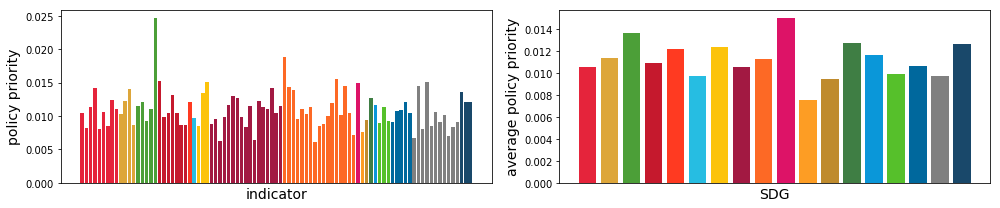

In [12]:
ps = Ps.mean(axis=0)
fig = plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
for i in range(sum(R)):
    plt.bar(i, ps[i], color=colors[r[i]])
plt.xticks([])
plt.xlabel('indicator', fontsize=14)
plt.ylabel('policy priority', fontsize=14)

plt.subplot(1,2,2)
sdgs = data.goal.values
sdg = '1'
sdg_ps = [[]]
sdg_color = [colors[0]]
for i in range(sum(R)):
    if sdgs[r[i]] == sdg:
        sdg_ps[-1].append(ps[i])
    else:
        sdg_ps.append([ps[i]])
        sdg = sdgs[r[i]]
        sdg_color.append(colors[r[i]])
for i, bar in enumerate(sdg_ps):
    plt.bar(i, np.mean(bar), color=sdg_color[i])
plt.xticks([])
plt.xlabel('SDG', fontsize=14)
plt.ylabel('average policy priority', fontsize=14)

plt.tight_layout()
plt.show()